In [1]:
import sys
sys.path.append('./data_prep')
sys.path.append('./models')

In [2]:
from clustering_models import service_type_sep, make_scaled_df, num_of_components, feature_explained_variance,\
                            scree_plot, elbow_method, k_distance_plot, clustering_model, cluster_evaluation, comparison_of_scores_kmeans,\
                            cluster_visualization, cluster_separation, clusters_center, compare_columns, cluster_center_visualize, visualize_service_type, comparison_of_scores_dbscan
from data_preparation import get_data, get_cluster_df, get_regression_df
# from EDA import box_plt, skew_kurt_graph

from itertools import product

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
# font_name = fm.FontProperties(fname="/Users/leeseohyun/Library/Fonts/AppleGothic.ttf").get_name()
# mpl.rc('font', family=font_name)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
''' 
# 전처리된 데이터 불러오기 

cnx = pymysql.connect(user='mt-1', password='1111', host='ec2-15-152-249-56.ap-northeast-3.compute.amazonaws.com', database='zigbang_project')
query = 'SELECT * FROM zigbang_project.zb_final_cluster;'
df = pd.read_sql(query, cnx)
cnx.close()
'''

# 군집분석에 맞는 전처리된 데이터 불러오기 
clustering_df = get_cluster_df()

clustering_df.shape

(34229, 47)

In [4]:
import pandas as pd

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

In [32]:
clustering_df.describe()

,_floor,size_m2,manage_cost_count,elevator,parking,near_subways_count,options_count,supermarket_dist,convenience_store_dist,school_dist,subway_dist,cultural_venue_dist,public_institution_dist,hospital_dist,building_dandok_p,building_apt_p,building_yeonlip_p,building_dasedae_p,building_nonresidential_p,building_others_p,gender_ratio,ppltn_foreign_domestic_ratio,aging,aged,post_aged,...,hhd_collective_p,hhd_private_p,hhd_family_p,hhd_alone_p,safety_idx,rent_adjusted,service_type_빌라,service_type_오피스텔,service_type_원룸,room_direction_text_남동향,room_direction_text_남서향,room_direction_text_남향,room_direction_text_동향,room_direction_text_북동향,room_direction_text_북서향,room_direction_text_북향,room_direction_text_서향,sales_type_월세,sales_type_전세,size_m2_standard_scaled,size_m2_robust_scaled,corp_to_pop_standard_scaled,corp_to_pop_robust_scaled,rent_standard_scaled,rent_robust_scaled
count,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.00000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,...,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,34229.000000,3.422900e+04,34229.000000,3.422900e+04,34229.000000,3.422900e+04,34229.000000
mean,6.219521,30.060105,1.544860,0.575039,0.705805,2.475679,5.829443,1302.414035,128.723480,497.078355,917.716089,3317.06512,582.044845,551.670484,0.125337,0.545291,0.037756,0.278647,0.012943,0.168113,1.020719,0.087385,0.562213,0.303106,0.031669,...,0.000675,0.942781,0.390408,0.378503,1.602355,73.709090,0.202927,0.241608,0.555465,0.111455,0.143709,0.259663,0.176400,0.060942,0.053201,0.074440,0.120190,0.942914,0.057086,-1.394971e-16,0.719149,5.181322e-16,0.293265,5.181322e-16,0.293265
std,6.649505,15.040351,1.368398,0.494344,0.455687,1.544129,3.393104,1023.938633,100.912938,294.846767,1067.130791,3369.10923,415.186602,380.691605,0.110506,0.286312,0.040762,0.218672,0.011454,0.267020,0.133598,0.162153,0.496122,0.459607,0.175120,...,0.000819,0.078219,0.138999,0.125333,0.736545,44.649541,0.402185,0.428064,0.496921,0.314700,0.350799,0.438456,0.381166,0.239228,0.224436,0.262489,0.325189,0.232010,0.232010,1.000015e+00,2.936992,1.000015e+00,1.050973,1.000015e+00,1.050973
min,1.000000,2.780000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,8.000000,5.000000,24.00000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.623000,0.003000,0.000000,0.000000,0.000000,...,0.000000,0.226000,0.054000,0.077000,0.000000,10.333000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.687427e-01,-0.951220,-1.419433e+00,-1.198498,-1.419433e+00,-1.198498
25%,2.000000,19.830000,0.000000,0.000000,0.000000,1.000000,5.000000,656.000000,61.000000,305.000000,374.000000,1178.00000,333.000000,314.000000,0.042000,0.300000,0.009000,0.079000,0.005000,0.029000,0.939000,0.020000,0.000000,0.000000,0.000000,...,0.000000,0.938000,0.298000,0.292000,1.000000,45.683000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-3.528227e-01,-0.317073,-6.276996e-01,-0.366420,-6.276996e-01,-0.366420
50%,3.000000,26.020000,2.000000,1.000000,1.000000,3.000000,7.000000,1075.000000,98.000000,474.000000,583.000000,2191.00000,522.000000,502.000000,0.099000,0.554000,0.028000,0.248000,0.011000,0.069000,0.988000,0.036000,1.000000,0.000000,0.000000,...,0.001000,0.970000,0.400000,0.360000,2.000000,61.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.448626e-01,0.000000,-2.790459e-01,0.000000,-2.790459e-01,0.000000
75%,8.000000,33.750000,3.000000

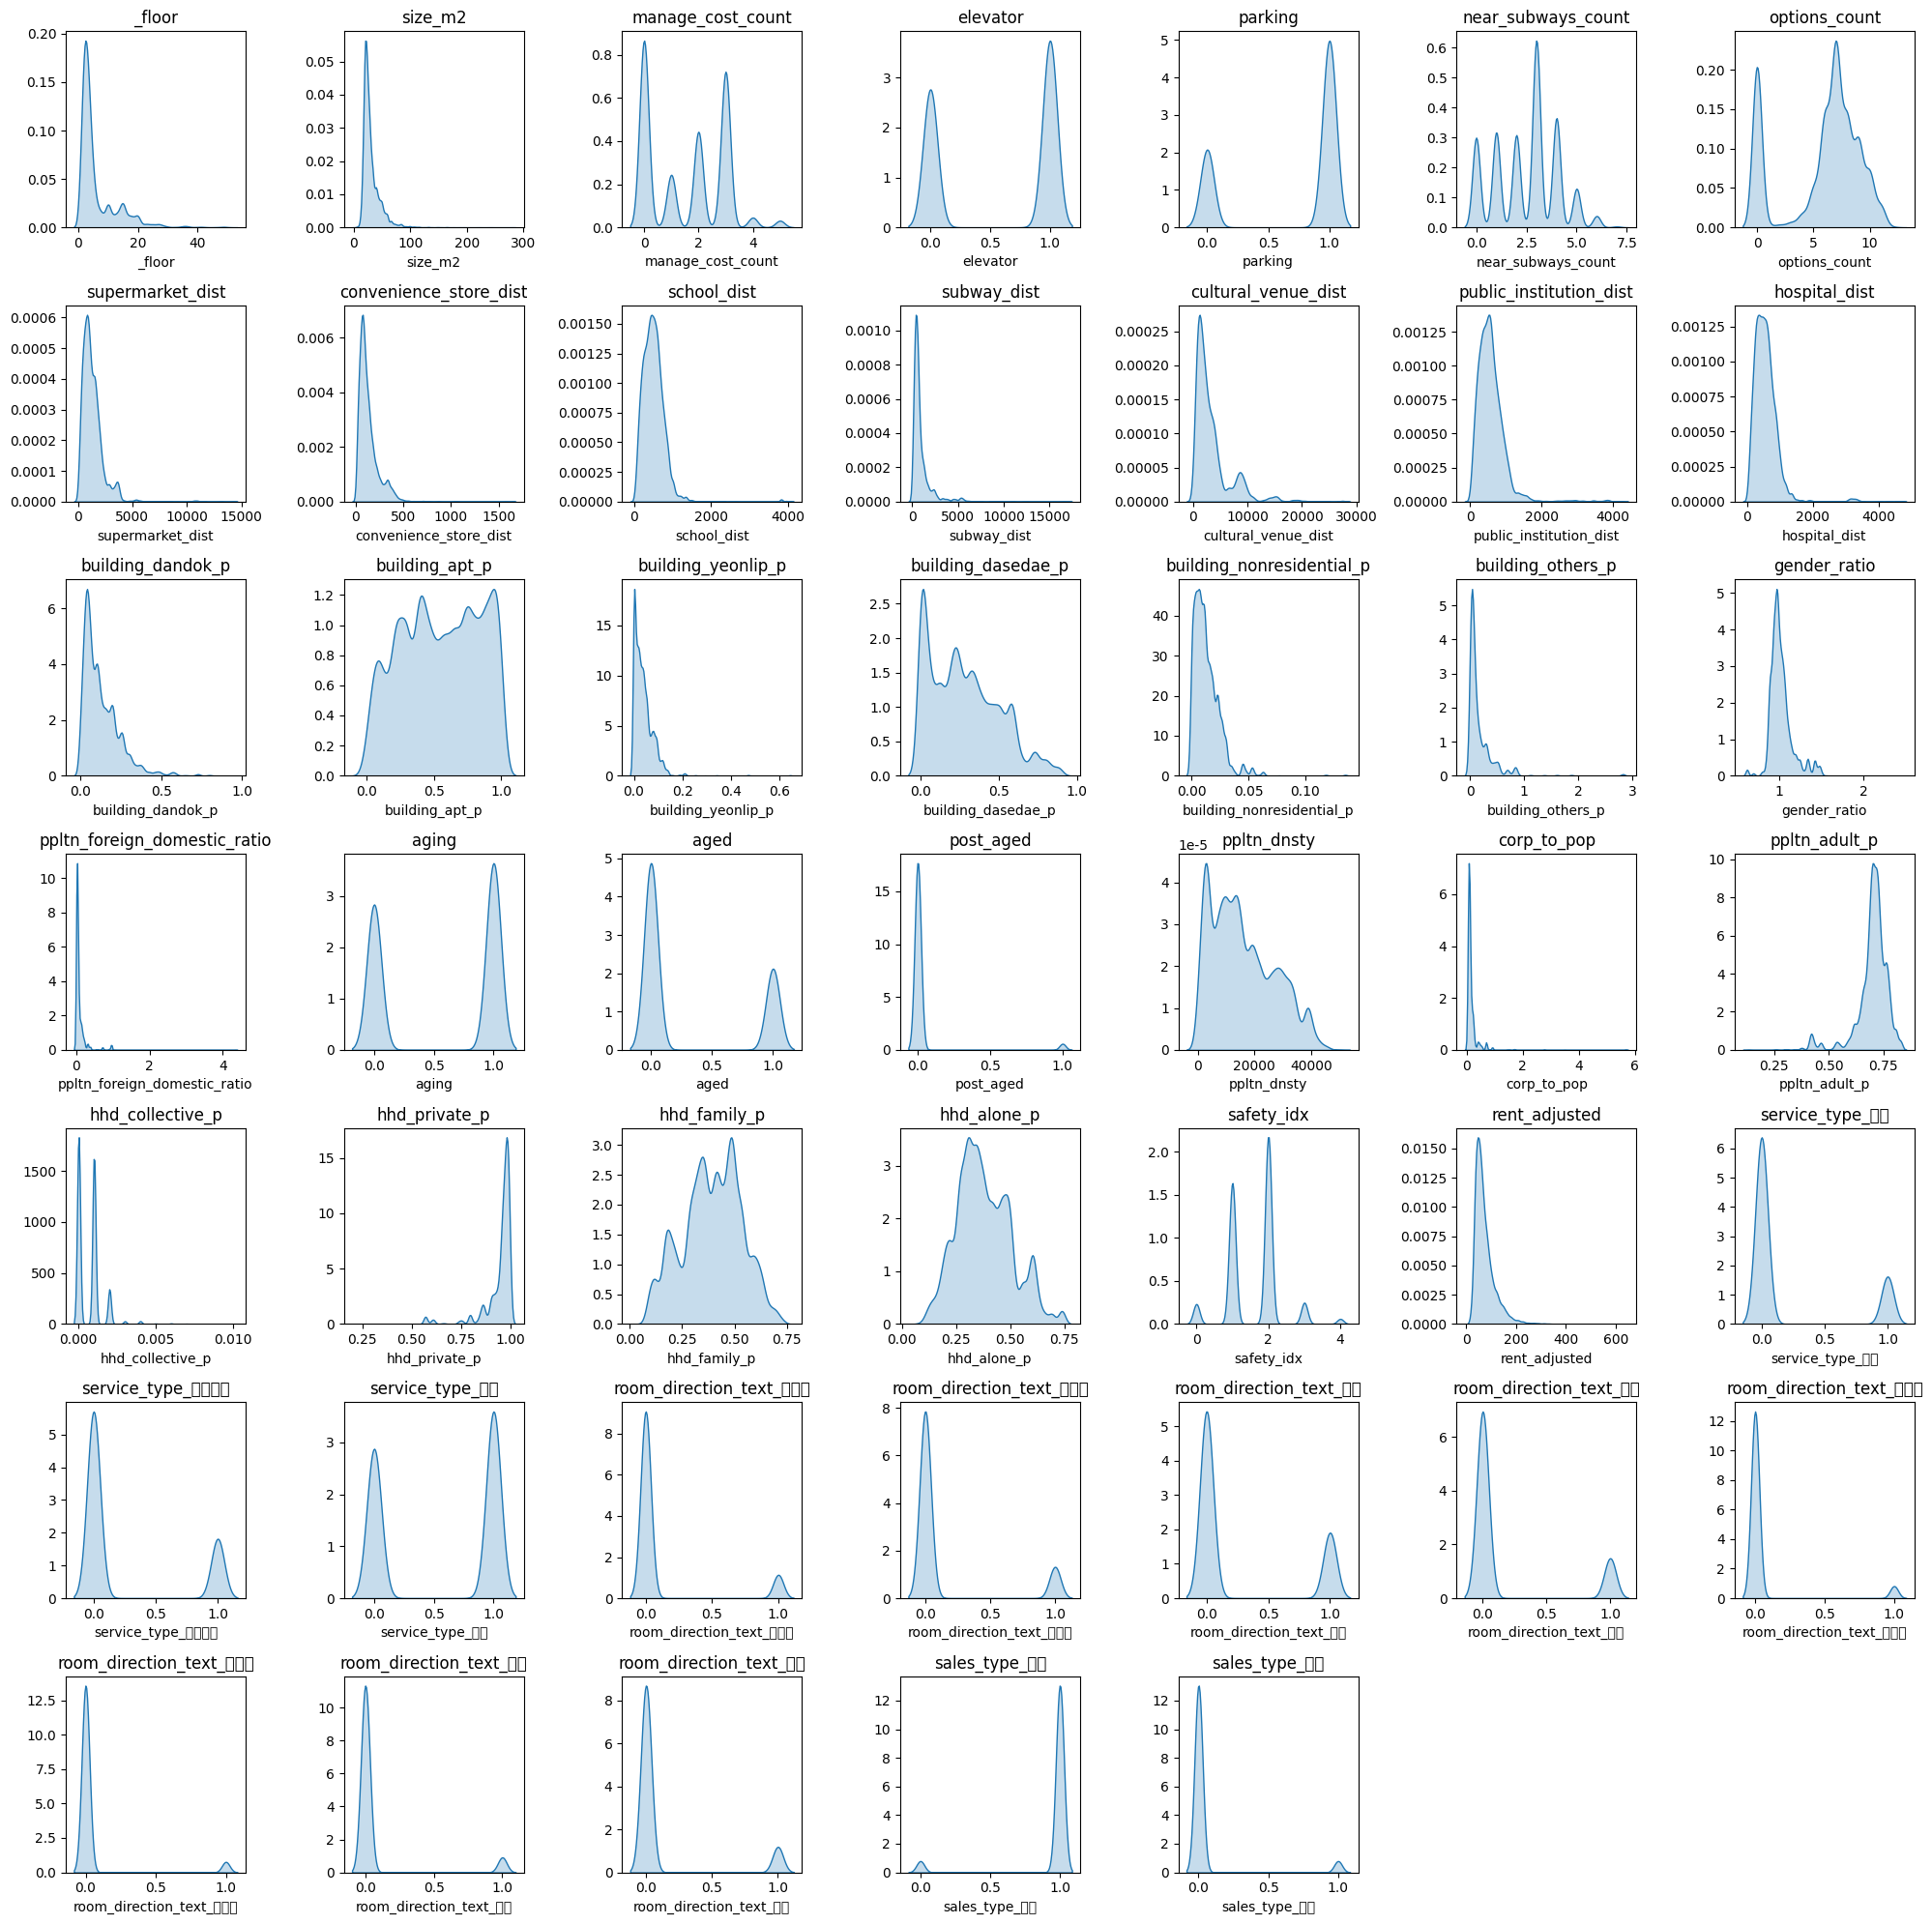

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(7, 7, figsize=(20, 20))
ax = ax.ravel()

for i, col in enumerate(clustering_df.columns):
    sns.kdeplot(clustering_df[col], ax=ax[i], fill=True)  
    ax[i].set_title(col)
    ax[i].set_ylabel('')

for j in range(47, 49):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standard_scaled = pd.DataFrame(scaler.fit_transform(clustering_df), columns=clustering_df.columns)

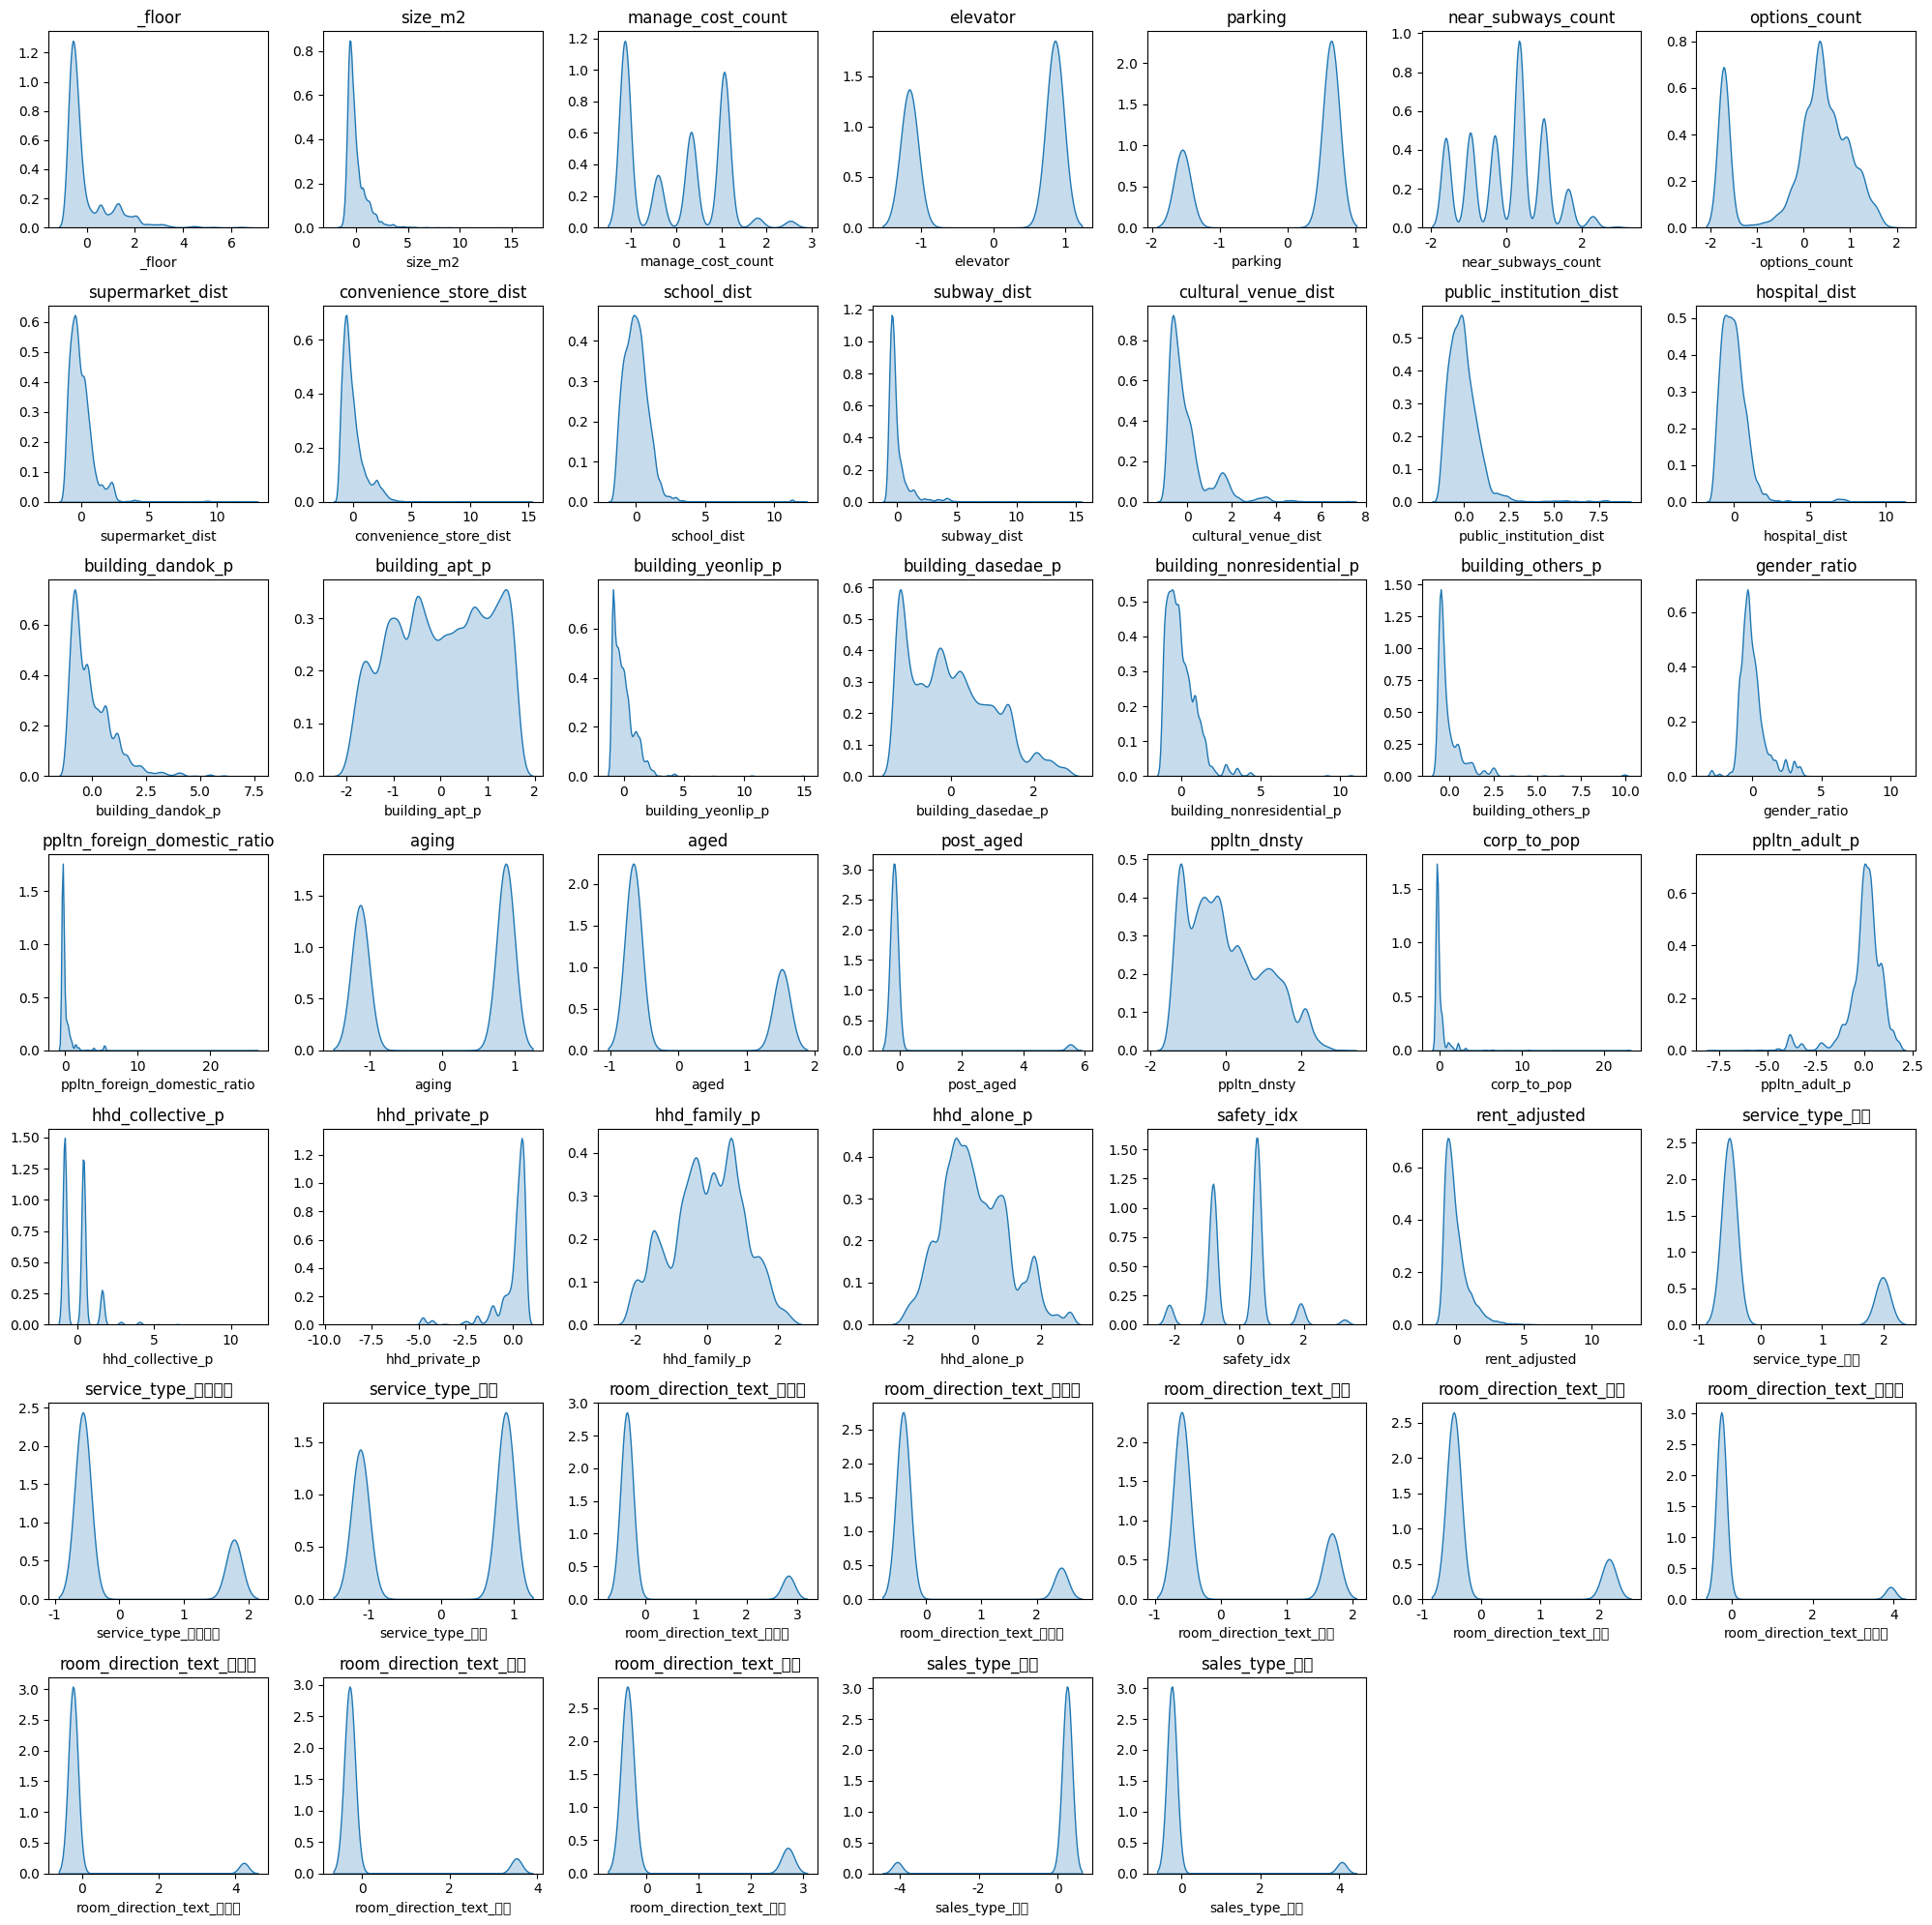

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(7, 7, figsize=(20, 20))
ax = ax.ravel()

for i, col in enumerate(standard_scaled.columns):
    sns.kdeplot(standard_scaled[col], ax=ax[i], fill=True)  
    ax[i].set_title(col)
    ax[i].set_ylabel('')

for j in range(47, 49):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

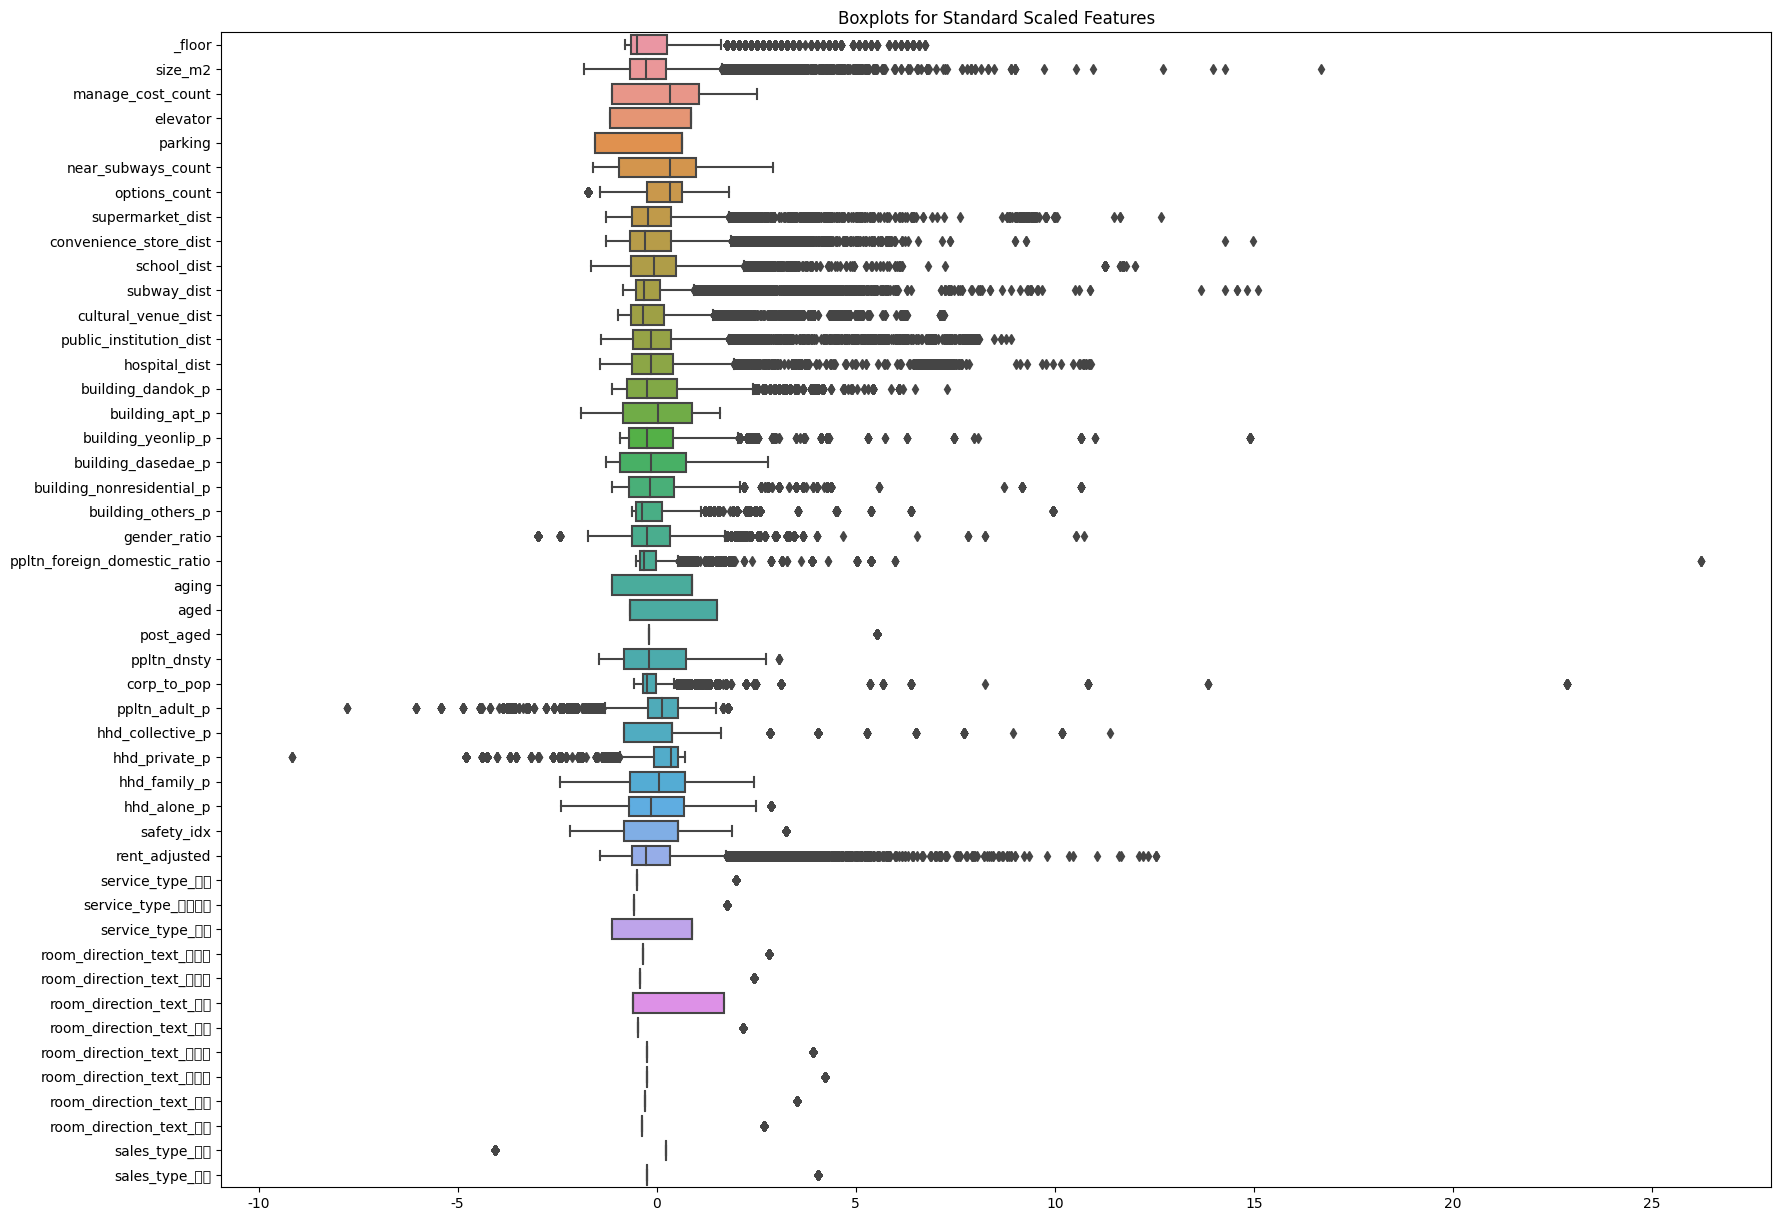

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.boxplot(data=standard_scaled, orient="h") 
plt.title("Boxplots for Standard Scaled Features")
plt.show()

In [13]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
robust_scaled = pd.DataFrame(scaler.fit_transform(clustering_df), columns=clustering_df.columns)

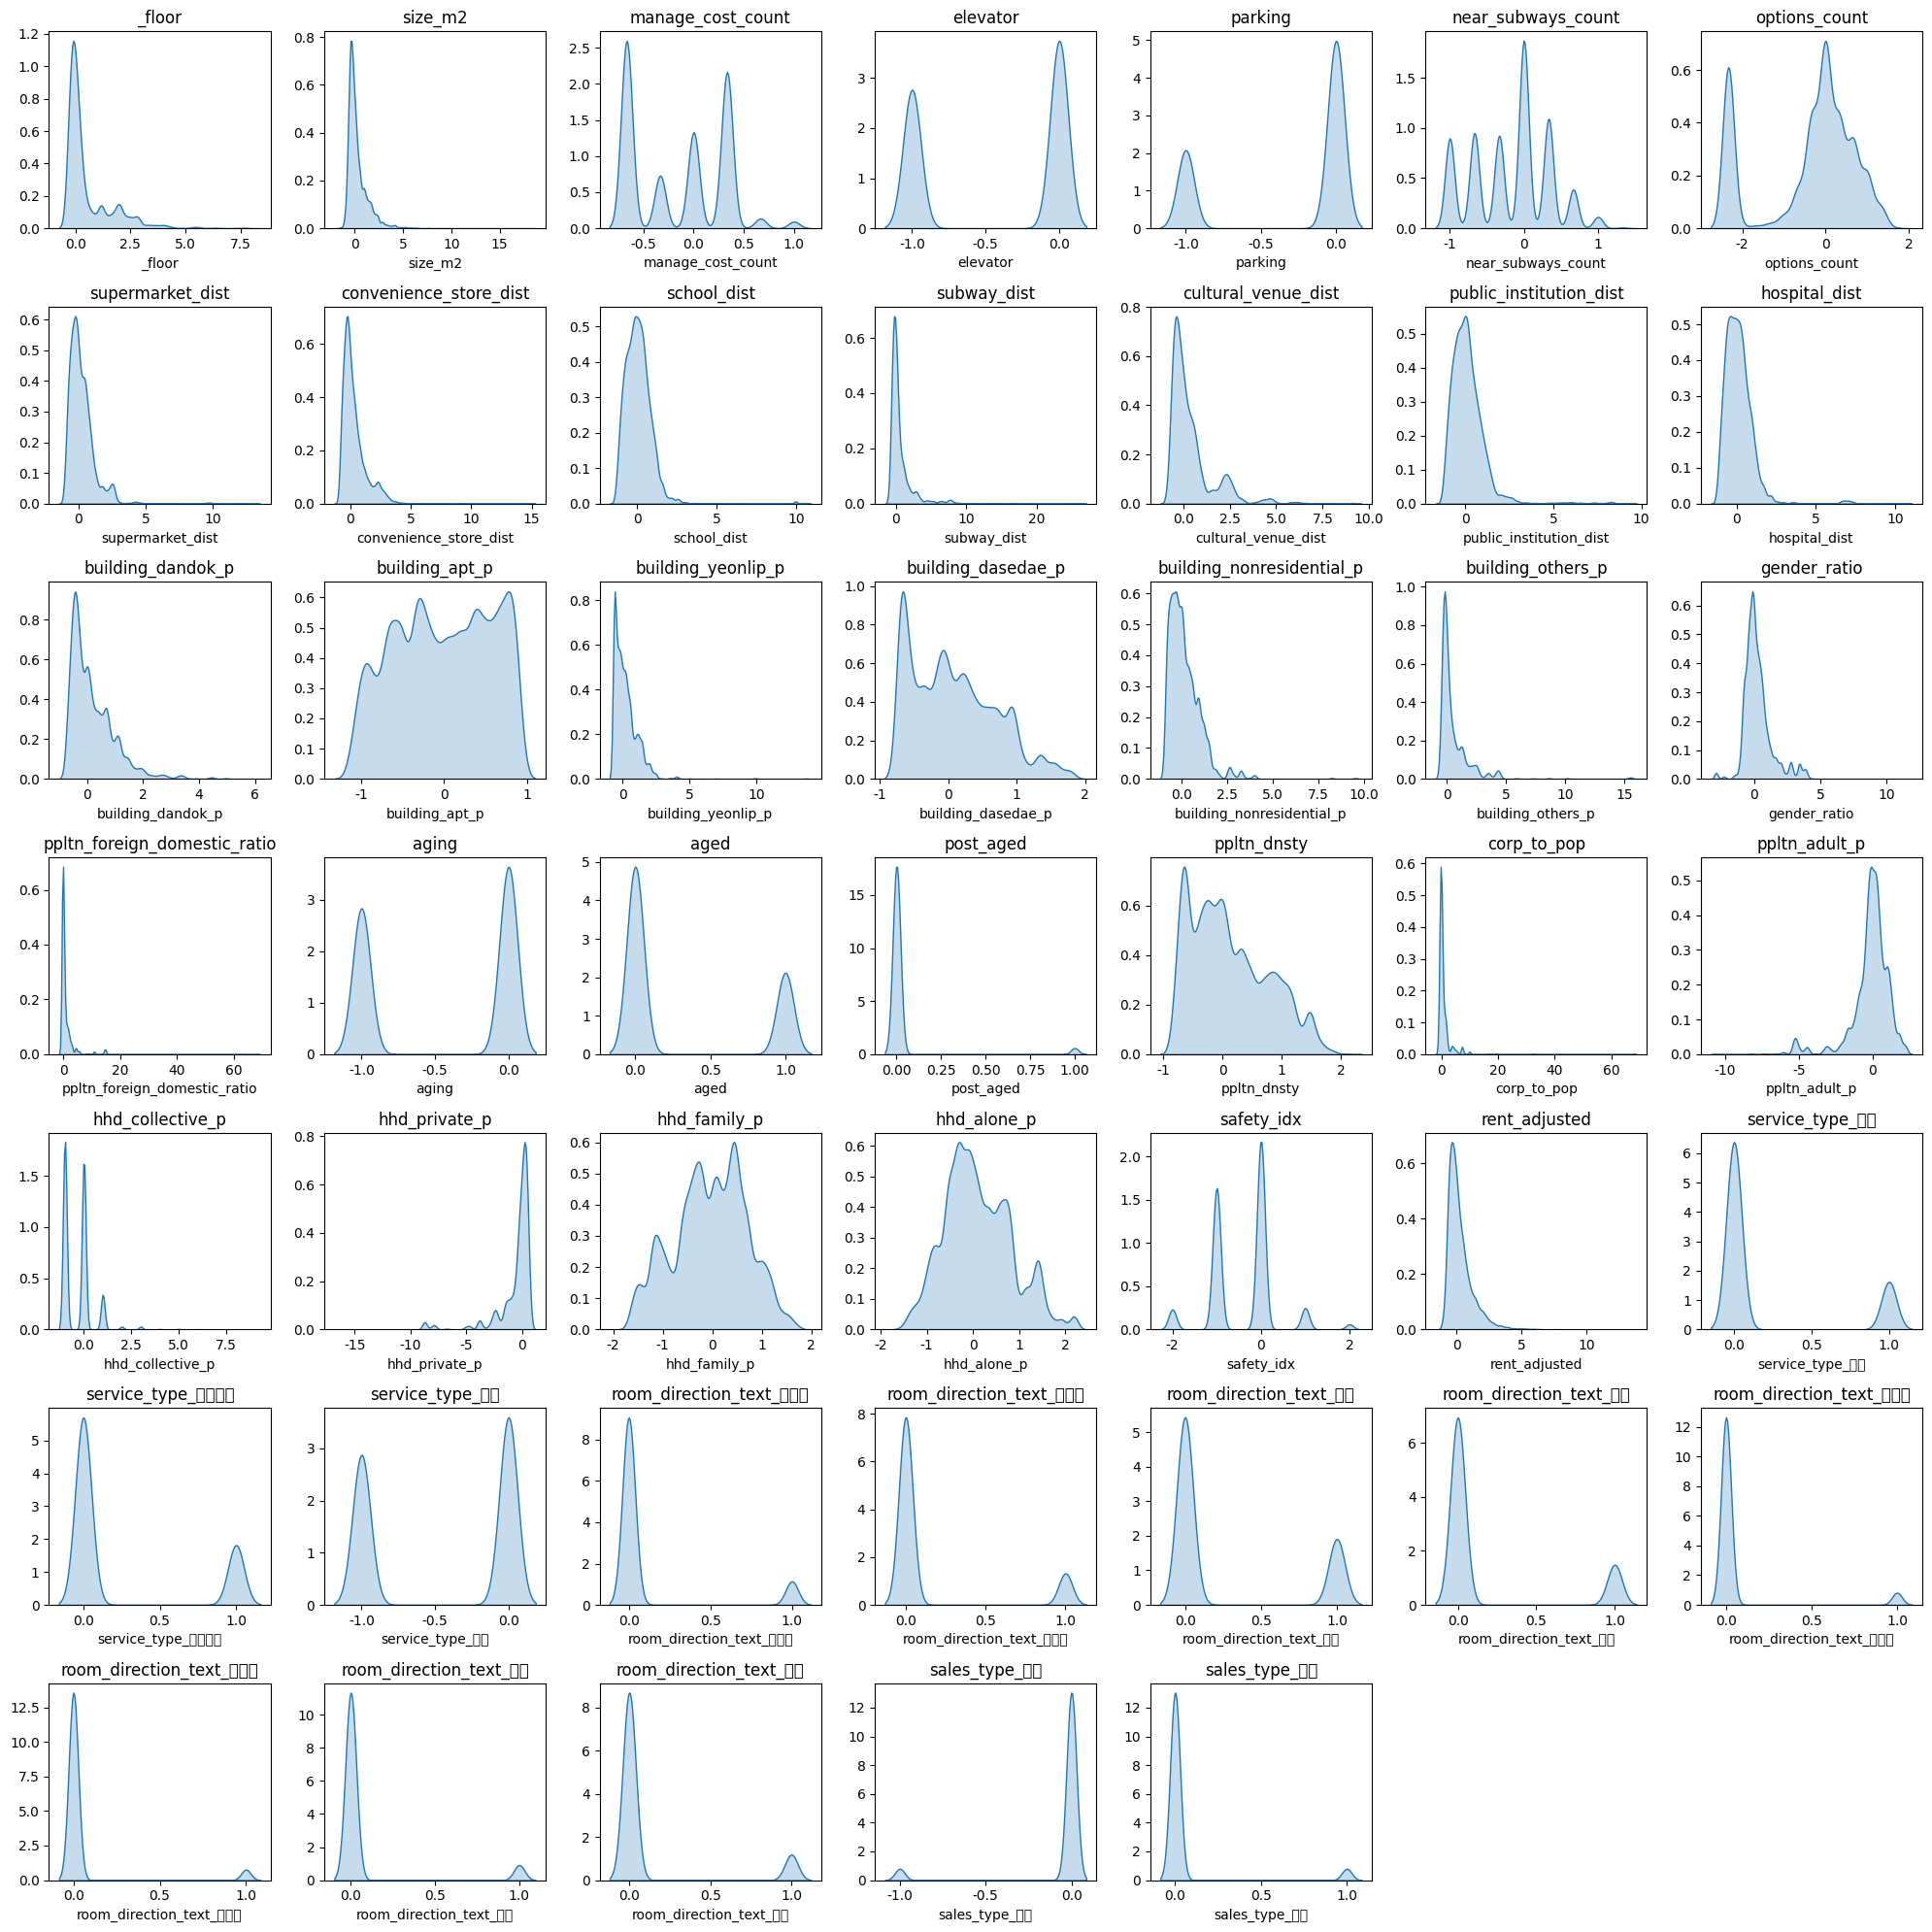

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(7, 7, figsize=(20, 20))
ax = ax.ravel()

for i, col in enumerate(robust_scaled.columns):
    sns.kdeplot(robust_scaled[col], ax=ax[i], fill=True)  
    ax[i].set_title(col)
    ax[i].set_ylabel('')

for j in range(47, 49):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

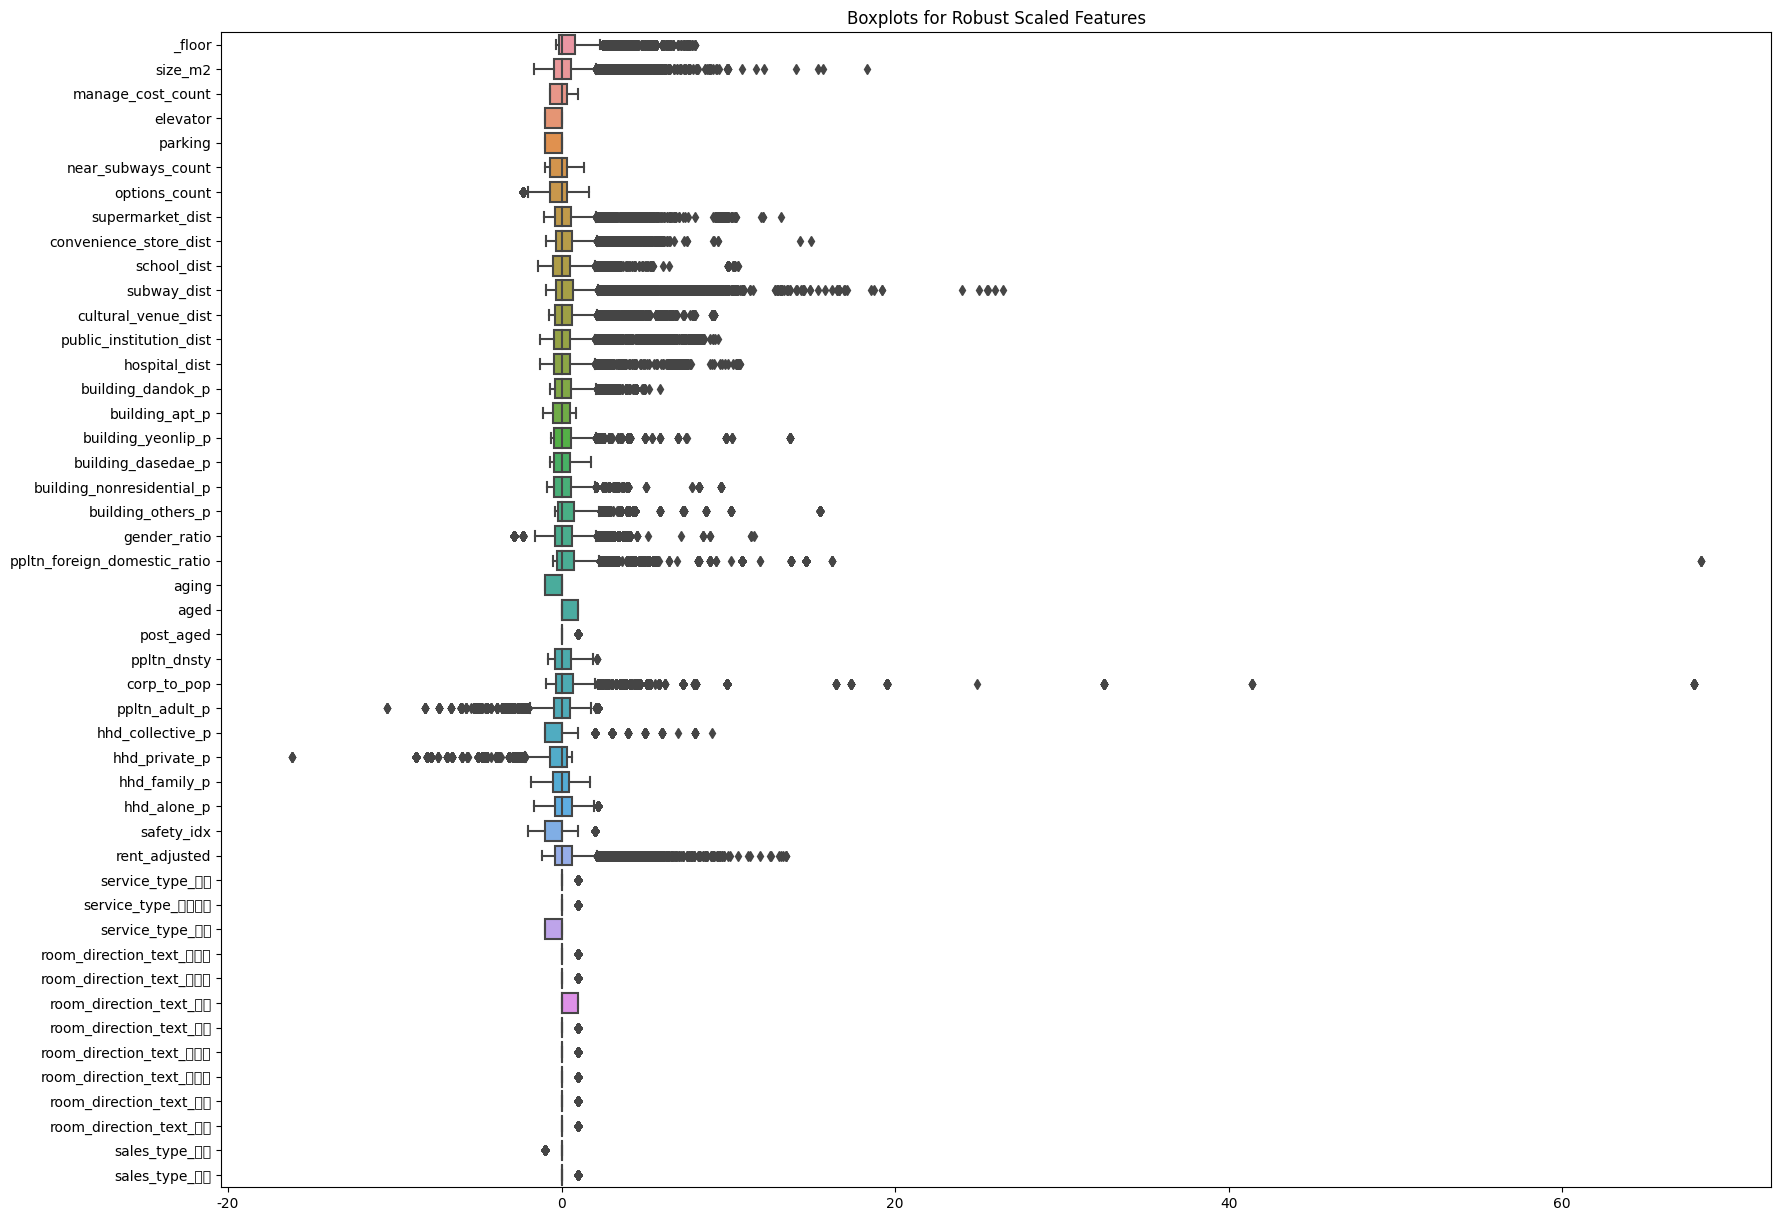

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.boxplot(data=robust_scaled, orient="h") 
plt.title("Boxplots for Robust Scaled Features")
plt.show()